#MNIST AUTOENCODER

- encoder embeds 784-d input (28x28 images) onto 128-d latent space which is rendered into 16x8 images.

- decoder takes in 128-d encoder output and maps it back onto 784-d space. 

- both the original image, latent space representation, and the final decoder output are visualized.

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

In [34]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [35]:
X_train, X_test = X_train / 255. , X_test/255. 

print(X_train.shape)

X_train = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2])

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(60000, 784)
(10000, 784)


In [36]:
encoder = tf.keras.Sequential([tf.keras.layers.Dense(128, activation="relu", input_shape=(784,))])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(784, activation="relu", input_shape=(128,))])

autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer="sgd", metrics = "mse")

In [37]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1583 - mse: 0.1583
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1106 - mse: 0.1106
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1008 - mse: 0.1008
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0957 - mse: 0.0957
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0906 - mse: 0.0906
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0834 - mse: 0.0834
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0804 - mse: 0.0804
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0783 - mse: 0.0783
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0763 - mse: 0.0763
Epoch 11/50
1875/1875 [======

In [38]:
latent_space = encoder.predict(X_train[:10])
decoder_output = decoder.predict(latent_space)

print(latent_space.shape, decoder_output.shape)
print(type(latent_space))

(10, 128) (10, 784)
<class 'numpy.ndarray'>


In [39]:
#put the latent space and decoder output images into appropriate dimensions and visualize.
latent_space = latent_space.reshape((-1, 16, 8))
decoder_output = decoder_output.reshape((-1, 28, 28))

print(latent_space.shape, decoder_output.shape)

(10, 16, 8) (10, 28, 28)


In [40]:
def display_row(disp_images, offset, shape=(28,28)):
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks=(None) #no ticks just image
    plt.yticks=([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image)

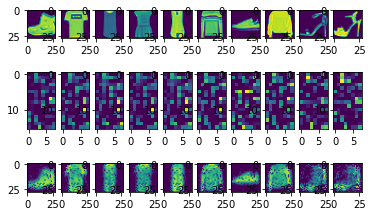

In [41]:
display_row(X_train[:10], offset=0, shape=(28,28))
display_row(latent_space[:10], offset=10, shape=(16,8))
display_row(decoder_output[:10], offset=20, shape=(28,28))